In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')
!gdown 1DqBZqItLs_a0ujxrcDuJQJlZ8GI5orWr

Downloading...
From: https://drive.google.com/uc?id=1DqBZqItLs_a0ujxrcDuJQJlZ8GI5orWr
To: /content/Automobile_data.csv
100% 25.1k/25.1k [00:00<00:00, 33.2MB/s]


In [ ]:
data = pd.read_csv('Automobile_data.csv')

In [ ]:
data.head(6)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250


In [ ]:
data.shape

(205, 26)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
# for i in range(205):
#   if data.loc[i,'num-of-doors'] == 'two':
#     data.loc[i,'num-of-doors'] = 2
#   elif data.loc[i,'num-of-doors'] == 'four':
#     data.loc[i,'num-of-doors'] = 4

In [ ]:
for col in data.columns:
  for i in range(205):
    if data.loc[i,col] == '?':
      data.loc[i,col] = np.nan

In [ ]:
data.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [ ]:
#change numinal datas which were seted wrongly object
false_obj = ['bore','stroke','horsepower','peak-rpm','price']
data[false_obj] = data[false_obj].astype('float64')

In [ ]:
from sklearn.impute import KNNImputer
knn_impute = KNNImputer()

#define numinal columns
num_col = [col for col in data.columns if data[col].dtype in ['int64','float64']]
#fill nan data in numinal columns
data_num = pd.DataFrame(knn_impute.fit_transform(data[num_col]))
#return numinal columns name to data_num
data_num.columns = data[num_col].columns
#drop num_col from original dataset
data = data.drop(num_col,axis=1)
#concat imputed numinal dataset to main dataset
data = pd.concat([data,data_num],axis=1)

In [ ]:
label =data.price
data = data.drop(['price','normalized-losses'],axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               205 non-null    object 
 1   fuel-type          205 non-null    object 
 2   aspiration         205 non-null    object 
 3   num-of-doors       203 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   engine-type        205 non-null    object 
 8   num-of-cylinders   205 non-null    object 
 9   fuel-system        205 non-null    object 
 10  symboling          205 non-null    float64
 11  wheel-base         205 non-null    float64
 12  length             205 non-null    float64
 13  width              205 non-null    float64
 14  height             205 non-null    float64
 15  curb-weight        205 non-null    float64
 16  engine-size        205 non

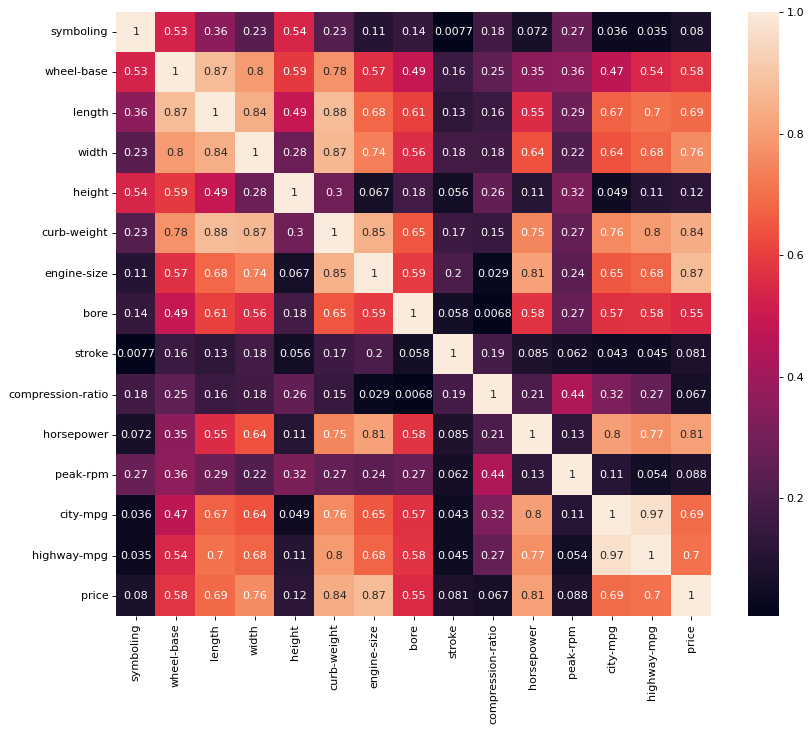

In [ ]:
corr_lst = [col for col in data.columns if data[col].dtype=='float64']
corr = pd.concat([data[corr_lst],label],axis=1)
fig = plt.figure(figsize=(12,10),dpi=80)
sns.heatmap(corr.corr().abs(),annot=True);

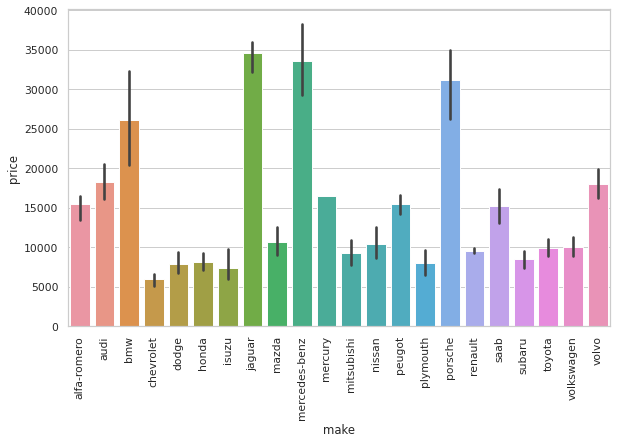

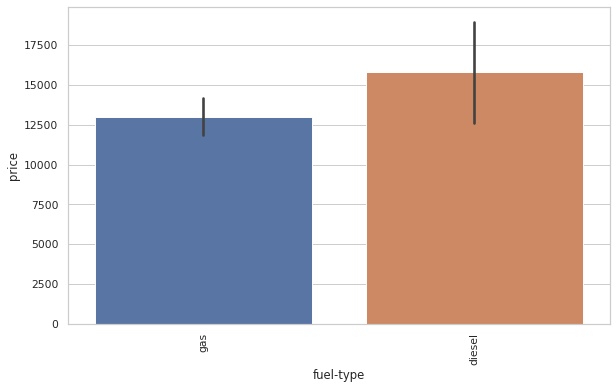

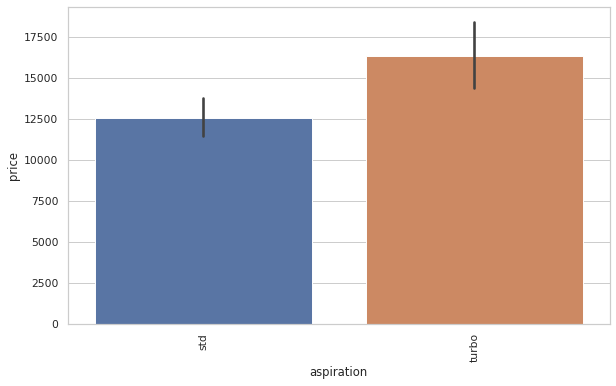

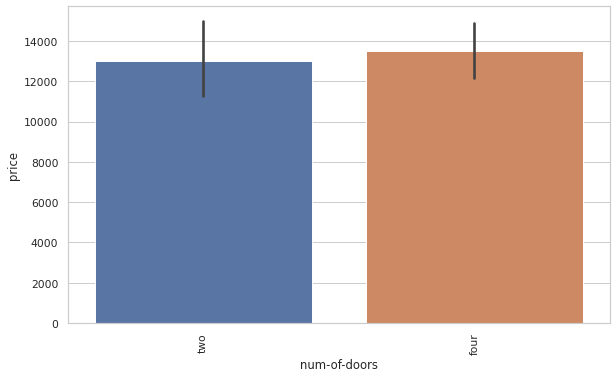

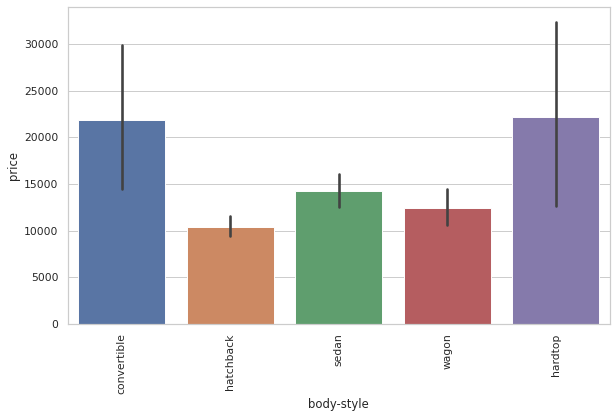

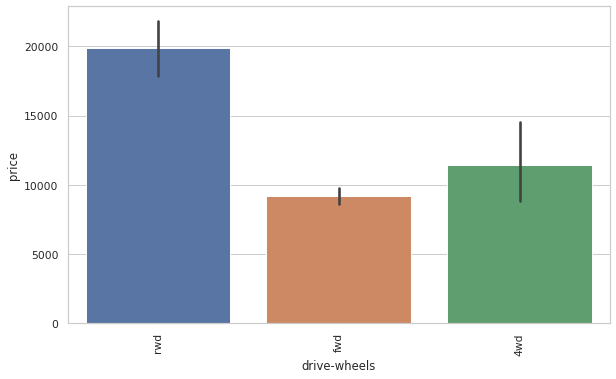

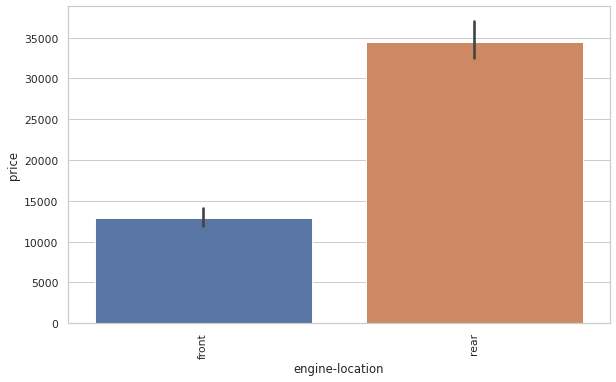

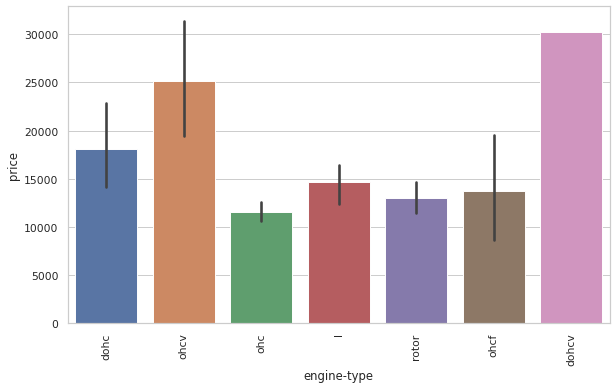

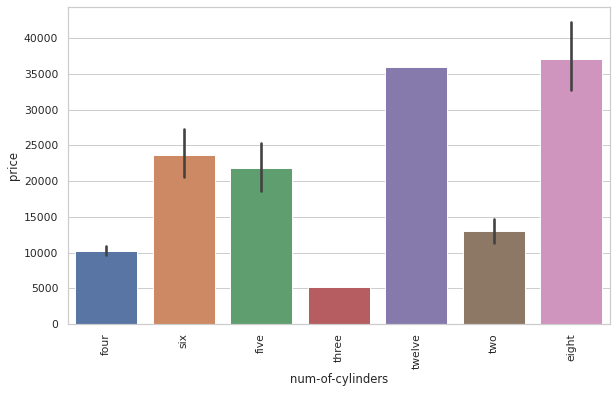

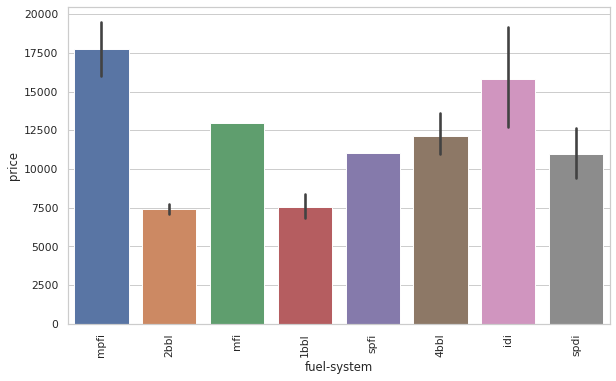

In [ ]:
sns.set_theme(style="whitegrid")
obj_lst = data.drop(corr_lst,axis=1).columns
def bar_plt(feature,label):
  sns.barplot(x=data[feature],y=label,estimator=np.mean)
for f in obj_lst:
  fig = plt.figure(figsize=(10,6),dpi=70)
  bar_plt(f,label)
  plt.xticks(rotation = 90)

In [ ]:
# categorize make column
categ_df = pd.concat([data[obj_lst],label],axis=1)
categ_df["make"] = (categ_df.groupby("make")["price"].transform("mean"))
#as you can see in the obove graph, the number of doors almost has no effrct on the price of the car, so I drpped its column
categ_df = categ_df.drop(['price','num-of-doors'],axis=1)

for i in categ_df.make:
  if i>25000:
    categ_df.make[(list(categ_df.make)).index(i)] = int(2)
  elif i<25000 and i>15000:
    categ_df.make[(list(categ_df.make)).index(i)]  = int(1)
  else:
    categ_df.make[(list(categ_df.make)).index(i)] = int(0)

In [ ]:
# categorize engine column
categ_df['engine-type'] = [1 if i in ['dohc', 'dohcv','ohcv'] else 0 for i in categ_df['engine-type']]

In [ ]:
# categorize cylinders column
categ_df['num-of-cylinders'] = [0 if i in ['two', 'three','four'] else 1 for i in categ_df['num-of-cylinders']]

In [ ]:
cat_lst = [col for col in categ_df.columns if len(set(categ_df[col]))<6]
new_data = pd.concat([categ_df[cat_lst],data[corr_lst]],axis=1)

In [ ]:
new_data = pd.get_dummies(new_data,drop_first=True)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(new_data,label)

In [ ]:
#normalize
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
#pca
pca = PCA(20)
X_train_pca = pca.fit_transform(X_train_scaled)
for i in range(15):
  print(f'PCA {i+1} has {np.cumsum(pca.explained_variance_ratio_*100)[i]}')

PCA 1 has 35.863014247921676
PCA 2 has 50.015855979036196
PCA 3 has 58.28213934216035
PCA 4 has 64.86025825773939
PCA 5 has 70.94801208536255
PCA 6 has 75.6782880575954
PCA 7 has 79.86110862018624
PCA 8 has 83.50246327447
PCA 9 has 86.28340413230214
PCA 10 has 88.9223441111404
PCA 11 has 91.02882730268121
PCA 12 has 93.08005080002917
PCA 13 has 94.51894469329481
PCA 14 has 95.8078584539098
PCA 15 has 96.96409126667241


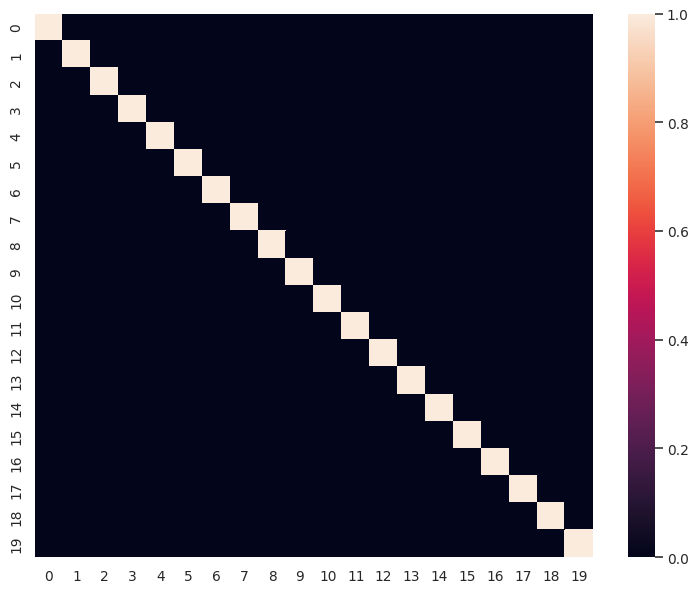

In [ ]:
fig = plt.figure(figsize=(10,8),dpi=90)
sns.heatmap(np.corrcoef(X_train_pca.T))

In [ ]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', StandardScaler()),
 ('pca', PCA(20)),
 ('model', XGBRegressor(objective='reg:squarederror'))])
pipe.fit(X_train,y_train)
pred = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score
r2_score = r2_score(y_test,pred)
print(r2_score)
error = mean_absolute_percentage_error(y_test,pred)
print(error)

0.8651757728754348
0.12192059930068967


In [ ]:
prediction = pd.DataFrame(pred)
ground_truth = pd.DataFrame(y_test.to_list())
prediction.columns=['Prediction']
ground_truth.columns=['True value']
compare_df = pd.concat([prediction,ground_truth],axis=1)

In [ ]:
compare_df

,Prediction,True value
0,10456.303711,13845.0
1,7768.625000,7957.0
2,6806.251465,6043.6
3,8789.969727,11595.0
4,9214.939453,9639.0
5,13716.099609,16630.0
6,16007.435547,12940.0
7,8976.416016,8778.0
8,10213.815430,11549.0
9,6885.998535,6529.0


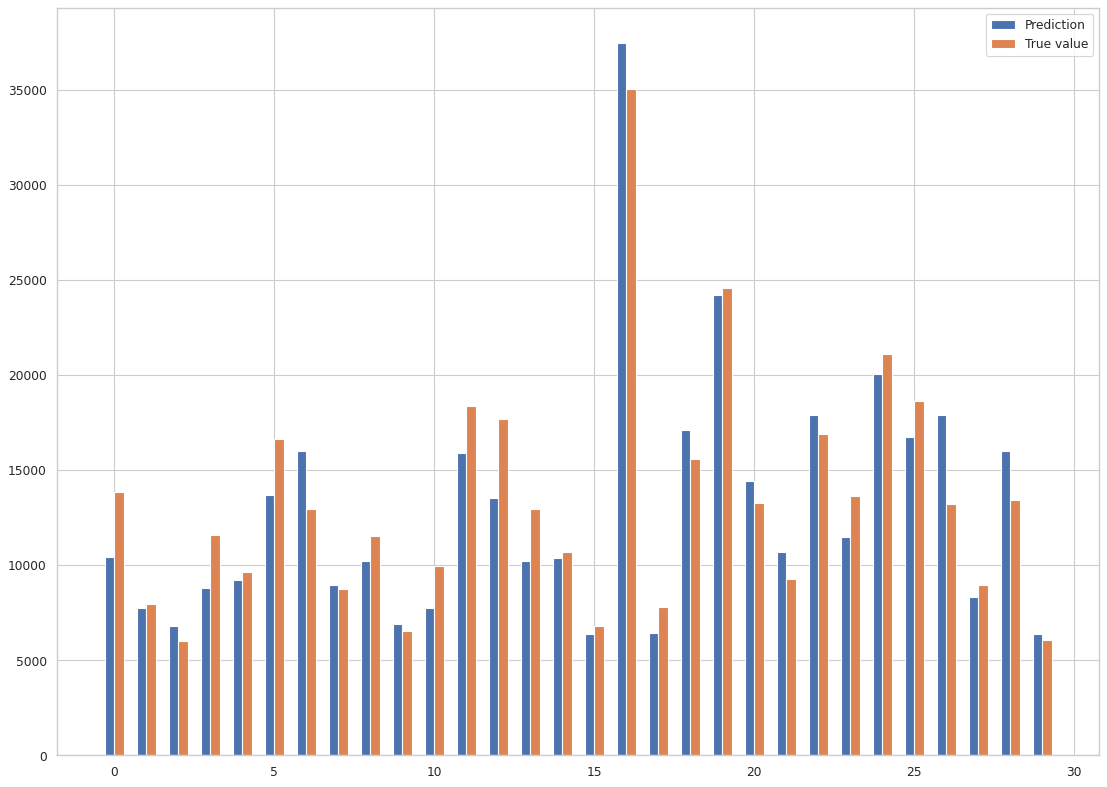

In [ ]:
labels = [i for i in range(30)]
pred = compare_df.iloc[:30,0]
true = compare_df.iloc[:30,1]
x = np.arange(len(labels))
width = 0.3
fig = plt.figure(figsize=(14,10),dpi=80)
rects1 = plt.bar(x - width/2, pred, width, label='Prediction')
rects2 = plt.bar(x + width/2, true, width, label='True value')
plt.legend()
plt.tight_layout()
plt.show()